# Import dati

In [2]:
from google.colab import drive 
import pandas as pd
import re
from glob import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df = pd.read_csv('/content/gdrive/My Drive/DS Lab - PROGETTO/Ottobre/dataset_completo.csv')
df.head()

,ad_form_id,suspicious,clicks,impressions,buy,os_android,os_bsd,os_ios,os_linux,os_osx,...,feelings1_surprise,feelings1_sympathy,feelings1_thirst,feelings1_thoughtful,feelings1_torment,feelings1_traditionalist,feelings1_trust,feelings1_uncategorized,feelings1_violence,feelings1_wealth
0,7241135337730459930,0,0,1,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8408205703932483258,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5884145627470739741,0,0,2,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2463214613830580928,0,0,6,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6157419832685345406,0,0,3,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.columns

Index(['ad_form_id', 'suspicious', 'clicks', 'impressions', 'buy',
       'os_android', 'os_bsd', 'os_ios', 'os_linux', 'os_osx',
       ...
       'feelings1_surprise', 'feelings1_sympathy', 'feelings1_thirst',
       'feelings1_thoughtful', 'feelings1_torment', 'feelings1_traditionalist',
       'feelings1_trust', 'feelings1_uncategorized', 'feelings1_violence',
       'feelings1_wealth'],
      dtype='object', length=1416)

# Analisi

**NB** sospicious = 1 → sospette frodi

In [6]:
#suspicious_0 = len(df[df["suspicious"] == 0])

Totali raggruppati per suspicious

In [7]:
df['suspicious'].value_counts()

0    82412
1      152
Name: suspicious, dtype: int64

In [8]:
count_0_susp = len(df[df['suspicious'] == 0])
count_susp = len(df[df['suspicious'] == 1])
pct_of_0_susp = count_0_susp/(count_0_susp + count_susp)
print("percentage of 0 suspicious is", pct_of_0_susp*100)
pct_of_susp = count_susp/(count_0_susp + count_susp)
print("percentage of suspicious", pct_of_susp*100)

percentage of 0 suspicious is 99.81590039242285
percentage of suspicious 0.18409960757715227


Esistono impressions = 0 e clicks > 0: come li gestiamo?

Gerli ci aveva detto:
- click > impression perché vengono dalla pubblicità delle mail, quindi ha click attivo ma non impression (inizialmente noi abbiamo detto che quelli con impression pari a 0 le eliminiamo perché non ci interessa le pubblicità delle mail)

In [9]:
len(df[df["impressions"] == 0])

24

In [10]:
len(df[(df["clicks"] > 0) & (df["impressions"] == 0)])

24

Aggiungo colonna con rapporto clicks/impressions

In [11]:
df["clicks/impressions"] = df["clicks"]/df["impressions"]
df

,ad_form_id,suspicious,clicks,impressions,buy,os_android,os_bsd,os_ios,os_linux,os_osx,...,feelings1_sympathy,feelings1_thirst,feelings1_thoughtful,feelings1_torment,feelings1_traditionalist,feelings1_trust,feelings1_uncategorized,feelings1_violence,feelings1_wealth,clicks/impressions
0,7241135337730459930,0,0,1,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8408205703932483258,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5884145627470739741,0,0,2,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2463214613830580928,0,0,6,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6157419832685345406,0,0,3,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82559,2184037250506325903,0,0,2,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82560,6149323461207714452,0,0,3,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82561,7551278096513860694,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82562,3323314347724824198,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Tengo solo le righe con impressions > 0

In [12]:
df = df[df["impressions"] > 0]

In [13]:
grouped = df[["suspicious", "clicks/impressions"]].groupby("suspicious", as_index = False)

In [14]:
agg = grouped["clicks/impressions"].agg([np.mean, np.median, np.std, np.min, np.max])
agg

,mean,median,std,amin,amax
suspicious,,,,,
0,0.001261,0.0,0.031274,0.0,3.4
1,0.002667,0.0,0.032660,0.0,0.4


0         AxesSubplot(0.1,0.15;0.363636x0.75)
1    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

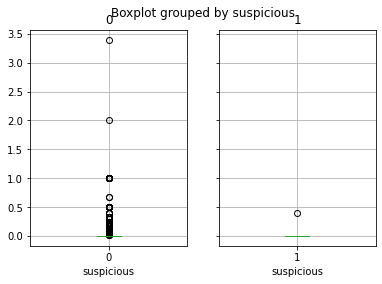

In [15]:
grouped.boxplot(by ='suspicious', column = ['clicks/impressions'], grid = True)

## Os type

In [16]:
#os_suspicious_0 = df[df["suspicious"] == 0].groupby(['os_android', 'os_bsd', 'os_ios', 'os_linux', 'os_osx', 'os_windows', 'os_other'], as_index = False)['clicks/impressions'].mean()

In [17]:
#os_suspicious_1 = df[df["suspicious"] == 1].groupby(['os_android', 'os_bsd', 'os_ios', 'os_linux', 'os_osx', 'os_windows', 'os_other'], as_index = False)['clicks/impressions'].mean()

In [18]:
#os_suspicious_1

In [19]:
len(df[(df["suspicious"] == 1) & (df["os_windows"] == 1)]) 

10

In [20]:
os_suspicious = df.groupby(by=['suspicious', 'os_android', 'os_bsd', 'os_ios', 'os_linux', 'os_osx', 'os_windows', 'os_other'], 
                           as_index = False)['clicks/impressions'].mean()
os_suspicious

,suspicious,os_android,os_bsd,os_ios,os_linux,os_osx,os_windows,os_other,clicks/impressions
0,0,0,0,0,0,0,0,1,0.000000
1,0,0,0,0,0,0,1,0,0.001353
2,0,0,0,0,0,1,0,0,0.001139
3,0,0,0,0,1,0,0,0,0.001140
4,0,0,1,0,0,0,0,0,0.000000
5,0,1,0,0,0,0,0,0,0.001102
6,1,0,0,0,0,0,0,1,0.003361
7,1,0,0,0,0,0,1,0,0.000000
8,1,0,0,1,0,0,0,0,0.000000
9,1,1,0,0,0,0,0,0,0.000000


In [21]:
os_type = pd.Series(os_suspicious.loc[:, os_suspicious.columns != 'suspicious'].columns[np.where(os_suspicious.loc[:, os_suspicious.columns != 'suspicious']==1)[1]])
os_type

0      os_other
1    os_windows
2        os_osx
3      os_linux
4        os_bsd
5    os_android
6      os_other
7    os_windows
8        os_ios
9    os_android
dtype: object

In [22]:
if 'os_type' not in os_suspicious.columns:
  os_suspicious.insert(8, 'os_type', os_type)

In [23]:
os_suspicious['os_type'] = os_suspicious['os_type'].str.replace('os_', '') 

In [24]:
os_suspicious

,suspicious,os_android,os_bsd,os_ios,os_linux,os_osx,os_windows,os_other,os_type,clicks/impressions
0,0,0,0,0,0,0,0,1,other,0.000000
1,0,0,0,0,0,0,1,0,windows,0.001353
2,0,0,0,0,0,1,0,0,osx,0.001139
3,0,0,0,0,1,0,0,0,linux,0.001140
4,0,0,1,0,0,0,0,0,bsd,0.000000
5,0,1,0,0,0,0,0,0,android,0.001102
6,1,0,0,0,0,0,0,1,other,0.003361
7,1,0,0,0,0,0,1,0,windows,0.000000
8,1,0,0,1,0,0,0,0,ios,0.000000
9,1,1,0,0,0,0,0,0,android,0.000000


In [25]:
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

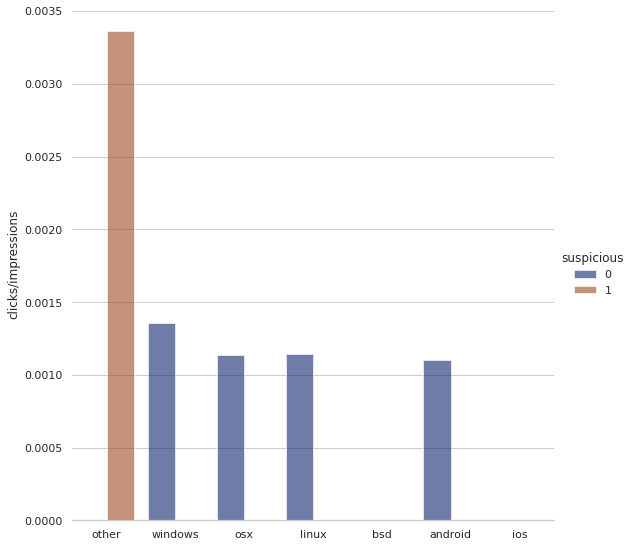

In [26]:
g = sns.catplot(
    data=os_suspicious, kind="bar",
    x="os_type", y="clicks/impressions", hue="suspicious",
    palette="dark", alpha=.6, height=8
)
g.despine(left=True)
g.set_axis_labels("", "clicks/impressions")
g.legend.set_title("suspicious")

## Device type

In [27]:
device_suspicious = df.groupby(['suspicious', 'device_type'], as_index = False)['clicks/impressions'].mean()
device_suspicious

,suspicious,device_type,clicks/impressions
0,0,1,0.001102
1,0,2,0.001318
2,0,3,0.000000
3,1,1,0.000000
4,1,2,0.000000
5,1,3,0.003361
6,1,5,0.000000


In [28]:
col_device_name = 'device_name'
if col_device_name not in device_suspicious.columns:
  device_suspicious.insert(3, col_device_name, (np.zeros(device_suspicious.shape[0], dtype=object)))

In [29]:
col_device_type = 'device_type'
for i, row in device_suspicious.iterrows():
  if row[col_device_type] == 1:
    device_suspicious.at[i, col_device_name] = 'mobile'
  elif row[col_device_type] == 2:
    device_suspicious.at[i, col_device_name] = 'desktop-laptop'
  elif row[col_device_type] == 3:
    device_suspicious.at[i, col_device_name] = 'unknown'
  elif row[col_device_type] == 4:
    device_suspicious.at[i, col_device_name] = 'tv'
  elif row[col_device_type] == 5:
    device_suspicious.at[i, col_device_name] = 'tablet'
  else:
    device_suspicious.at[i, col_device_name] = 'n/a'

In [30]:
device_suspicious

,suspicious,device_type,clicks/impressions,device_name
0,0,1,0.001102,mobile
1,0,2,0.001318,desktop-laptop
2,0,3,0.000000,unknown
3,1,1,0.000000,mobile
4,1,2,0.000000,desktop-laptop
5,1,3,0.003361,unknown
6,1,5,0.000000,tablet


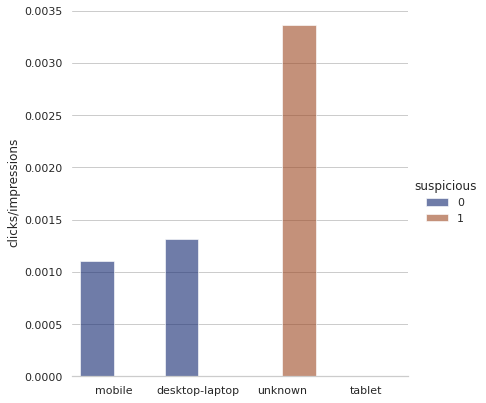

In [31]:
g1 = sns.catplot(
    data=device_suspicious, kind="bar",
    x="device_name", y="clicks/impressions", hue="suspicious",
    palette="dark", alpha=.6, height=6
)
g1.despine(left=True)
g1.set_axis_labels("", "clicks/impressions")
g1.legend.set_title("suspicious")

## Browser Type

In [32]:
prova = df[(df["suspicious"] == 1)]
prova2 = df[(df["suspicious"] == 0)]
num_susp1 = prova.groupby(by=['suspicious', 'browser_android', 'browser_chrome', 'browser_chromium', 'browser_edge',
                                'browser_firefox', 'browser_ie', 'browser_opera', 'browser_other',
                                'browser_safari', 'browser_unknown'], as_index = False)['suspicious'].count().rename(columns={'suspicious':'num_suspicious'})
num_susp1['suspicious'] = 1
num_susp0 = prova2.groupby(by=['suspicious', 'browser_android', 'browser_chrome', 'browser_chromium', 'browser_edge',
                                'browser_firefox', 'browser_ie', 'browser_opera', 'browser_other',
                                'browser_safari', 'browser_unknown'], as_index = False)['suspicious'].count().rename(columns={'suspicious':'num_suspicious'})
num_susp0['suspicious'] = 0

In [33]:
num_susp = pd.concat([num_susp0, num_susp1], ignore_index=True, sort=False)
# num_susp

In [34]:
bw_suspicious = df.groupby(by=['suspicious', 'browser_android', 'browser_chrome', 'browser_chromium', 'browser_edge',
                                'browser_firefox', 'browser_ie', 'browser_opera', 'browser_other',
                                'browser_safari', 'browser_unknown'], as_index = False)['clicks/impressions'].mean()
bw_suspicious

,suspicious,browser_android,browser_chrome,browser_chromium,browser_edge,browser_firefox,browser_ie,browser_opera,browser_other,browser_safari,browser_unknown,clicks/impressions
0,0,0,0,0,0,0,0,0,0,0,1,0.000000
1,0,0,0,0,0,0,0,0,0,1,0,0.001496
2,0,0,0,0,0,0,0,0,1,0,0,0.000000
3,0,0,0,0,0,0,0,1,0,0,0,0.000000
4,0,0,0,0,0,0,1,0,0,0,0,0.000664
5,0,0,0,0,0,1,0,0,0,0,0,0.001816
6,0,0,0,0,1,0,0,0,0,0,0,0.002322
7,0,0,1,0,0,0,0,0,0,0,0,0.001046
8,0,1,0,0,0,0,0,0,0,0,0,0.005544
9,1,0,0,0,0,0,0,0,0,1,0,0.000000


In [35]:
bw_suspicious['num_suspicious'] = num_susp['num_suspicious']
bw_suspicious

,suspicious,browser_android,browser_chrome,browser_chromium,browser_edge,browser_firefox,browser_ie,browser_opera,browser_other,browser_safari,browser_unknown,clicks/impressions,num_suspicious
0,0,0,0,0,0,0,0,0,0,0,1,0.000000,124
1,0,0,0,0,0,0,0,0,0,1,0,0.001496,5134
2,0,0,0,0,0,0,0,0,1,0,0,0.000000,3
3,0,0,0,0,0,0,0,1,0,0,0,0.000000,702
4,0,0,0,0,0,0,1,0,0,0,0,0.000664,2760
5,0,0,0,0,0,1,0,0,0,0,0,0.001816,3599
6,0,0,0,0,1,0,0,0,0,0,0,0.002322,10114
7,0,0,1,0,0,0,0,0,0,0,0,0.001046,59600
8,0,1,0,0,0,0,0,0,0,0,0,0.005544,354
9,1,0,0,0,0,0,0,0,0,1,0,0.000000,36


In [36]:
bw_type = pd.Series(bw_suspicious.loc[:, bw_suspicious.columns != 'suspicious'].columns[
                    np.where(bw_suspicious.loc[:, bw_suspicious.columns != 'suspicious']==1)[1]])
bw_type

0     browser_unknown
1      browser_safari
2       browser_other
3       browser_opera
4          browser_ie
5     browser_firefox
6        browser_edge
7      browser_chrome
8     browser_android
9      browser_safari
10      browser_opera
11         browser_ie
12    browser_firefox
13       browser_edge
14     browser_chrome
15    browser_android
dtype: object

In [37]:
if 'bw_type' not in bw_suspicious.columns:
  bw_suspicious.insert(12, 'bw_type', bw_type)

In [38]:
bw_suspicious['bw_type'] = bw_suspicious['bw_type'].str.replace('bw_', '')
bw_suspicious

,suspicious,browser_android,browser_chrome,browser_chromium,browser_edge,browser_firefox,browser_ie,browser_opera,browser_other,browser_safari,browser_unknown,clicks/impressions,bw_type,num_suspicious
0,0,0,0,0,0,0,0,0,0,0,1,0.000000,browser_unknown,124
1,0,0,0,0,0,0,0,0,0,1,0,0.001496,browser_safari,5134
2,0,0,0,0,0,0,0,0,1,0,0,0.000000,browser_other,3
3,0,0,0,0,0,0,0,1,0,0,0,0.000000,browser_opera,702
4,0,0,0,0,0,0,1,0,0,0,0,0.000664,browser_ie,2760
5,0,0,0,0,0,1,0,0,0,0,0,0.001816,browser_firefox,3599
6,0,0,0,0,1,0,0,0,0,0,0,0.002322,browser_edge,10114
7,0,0,1,0,0,0,0,0,0,0,0,0.001046,browser_chrome,59600
8,0,1,0,0,0,0,0,0,0,0,0,0.005544,browser_android,354
9,1,0,0,0,0,0,0,0,0,1,0,0.000000,browser_safari,36


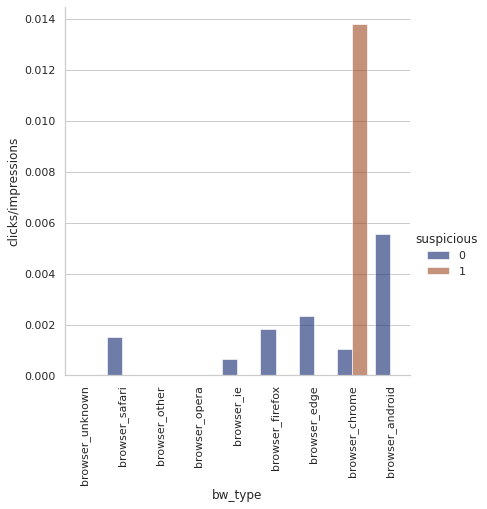

In [39]:
g2 = sns.catplot(
    data=bw_suspicious, kind="bar",
    x="bw_type", y="clicks/impressions", hue="suspicious",
    palette="dark", alpha=.6, height=6
)
g1.despine(left=True)
g1.set_axis_labels("", "clicks/impressions")
g1.legend.set_title("suspicious")
g2.set_xticklabels(rotation=90)

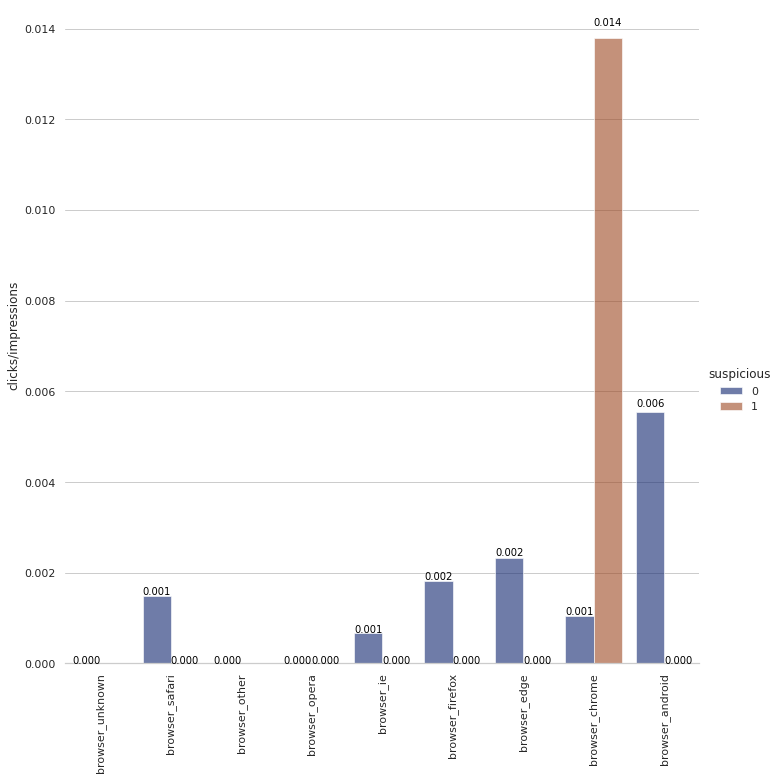

In [40]:
g2 = sns.catplot(
    data=bw_suspicious, kind="bar",
    x="bw_type", y="clicks/impressions", hue="suspicious",
    palette="dark", alpha=.6, height=10
)
g2.despine(left=True)
g2.set_axis_labels("", "clicks/impressions")
g2.legend.set_title("suspicious")
g2.set_xticklabels(rotation=90)

ax = g2.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x(), 
            p.get_height() * 1.02, 
            '{0:.3f}'.format( 
                #bw_suspicious['num_suspicious'][ax.patches.index(p)]
                p.get_height()
                ), 
            color='black', rotation='horizontal', size='small')

# Test sulle medie

Si esegue un test per verificare se le medie per suspicious=1 e suspicious=0 coincidono o meno.

In [41]:
alpha = 0.05

In [42]:
# verificare normalità
t_yes = df[(df['suspicious'] == 0)]['clicks/impressions']
t_no = df[(df['suspicious'] == 1)]['clicks/impressions']

# Shapiro Wilk
from scipy.stats import shapiro

stat, p = shapiro(t_yes)
print ('t_yes stat = %.3f, p = %.3f' % (stat, p)) 
if p > 0.05:
  print('Probably Gaussian')
else:
  print('Probably not Gaussian')

stat, p = shapiro(t_no)
print ('\nt_no stat = %.3f, p = %.3f' % (stat, p)) 
if p > 0.05:
  print('Probably Gaussian')
else:
  print('Probably not Gaussian')

t_yes stat = 0.018, p = 0.000
Probably not Gaussian

t_no stat = 0.055, p = 0.000
Probably not Gaussian


/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Poiché il valore p ottenuto dal test di Shapiro-Wilk è significativo (p < 0,05), concludiamo che i dati NON sono distribuiti normalmente. 
Pertanto, il test U di Mann-Whitney è più appropriato per l'analisi di due campioni.

In [43]:
import scipy.stats as stats
# 'greater' o 'less' per one-sided test
# stats.mannwhitneyu(x = t_yes, y = t_no, alternative = 'greater')
# stats.mannwhitneyu(x = t_yes, y = t_no, alternative = 'less')

# two-sided test quando le mediane non sono uguali
stats.mannwhitneyu(x = t_yes, y = t_no, alternative = 'two-sided')

MannwhitneyuResult(statistic=6156629.0, pvalue=0.4140570366835826)

Il test di Mann-Whitney è il test non parametrico che si usa al posto del t-test a campioni indipendenti quando non è soddisfatta la normalità nella distribuzione dei due campioni. 

Sebbene sia vero che il test t richiede come condizione che le popolazioni originarie seguano una distribuzione normale, all'aumentare della dimensione dei campioni, diventa meno sensibile al mancato rispetto di questa condizione. Per questo motivo, molto spesso, di fronte a campioni numerosi si assume vera l’ipotesi di normalità e si esegue il classico t-test.

Come con molti test non parametrici, il test di Mann–Whitney è meno potente del test t (è meno probabile che si rifiuti H0 quando è effettivamente falsa) poiché ignora gli outliers, cioè i valori anomali estremi, che si distanziano di molto rispetto agli altri valori che hai osservato.
Questa caratteristica, però, a sua volta rende il test di Mann–Whitney un test più robusto del test t. In particolare, la perdita di potenza è del 5%.

Poiché il valore 𝝆 ottenuto dal test U di Mann-Whitney è significativamente maggiore di α (𝝆 > 0,05) per cui concludiamo che non c'è evidenza di una differenza statisticamente significativa tra le due distribuzioni.

Stessa cosa viene confermata dal t-test.

In [44]:
# t-test
if (len(t_yes) > 0 and len(t_no) > 0):
  print('media dei suspicious:      ', round(t_yes.mean(), 3))#, '      click con probabilità 0: ', zinyes/len(t_yes))
  print('media dei non suspicious:  ', round(t_no.mean(), 3)) #, '      non click con probabilità 0: ', zinno/len(t_no))
  p_v = ttest_ind(t_yes, t_no)[1]
  print('p-value:                   ', round(p_v, 3))
  if p_v > alpha:
    print('➜ medie uguali')
  else:
    print('➜ medie diverse')
else:
  print('dati non sufficienti: # susp', len(t_yes), '; # non susp', len(t_no))

media dei suspicious:       0.001
media dei non suspicious:   0.003
p-value:                    0.582
➜ medie uguali


# Grafici con conteggio suspicious

Visualizzazione con scala lineare e logaritmica in quanto l'elevato numero dei conteggi per browser chrome non permetterebbe la visualizzazione dei valori molto più bassi.

## Os type

In [72]:
prova_os = df[(df["suspicious"] == 1)]
prova_os2 = df[(df["suspicious"] == 0)]
num_susp_os1 = prova_os.groupby(by=['suspicious', 'os_android', 'os_bsd', 'os_ios', 'os_linux', 'os_osx', 'os_windows', 'os_other'], 
                          as_index = False)['suspicious'].count().rename(columns={'suspicious':'num_suspicious'})
num_susp_os1['suspicious'] = 1
num_susp_os0 = prova_os2.groupby(by=['suspicious', 'os_android', 'os_bsd', 'os_ios', 'os_linux', 'os_osx', 'os_windows', 'os_other'], 
                           as_index = False)['suspicious'].count().rename(columns={'suspicious':'num_suspicious'})
num_susp_os0['suspicious'] = 0

num_susp_os = pd.concat([num_susp_os0, num_susp_os1], ignore_index=True, sort=False)
num_susp_os

os_suspicious['num_suspicious'] = num_susp_os['num_suspicious']
os_suspicious

,suspicious,os_android,os_bsd,os_ios,os_linux,os_osx,os_windows,os_other,os_type,clicks/impressions,num_suspicious
0,0,0,0,0,0,0,0,1,other,0.000000,17
1,0,0,0,0,0,0,1,0,windows,0.001353,50655
2,0,0,0,0,0,1,0,0,osx,0.001139,9616
3,0,0,0,0,1,0,0,0,linux,0.001140,468
4,0,0,1,0,0,0,0,0,bsd,0.000000,1
5,0,1,0,0,0,0,0,0,android,0.001102,21633
6,1,0,0,0,0,0,0,1,other,0.003361,119
7,1,0,0,0,0,0,1,0,windows,0.000000,10
8,1,0,0,1,0,0,0,0,ios,0.000000,2
9,1,1,0,0,0,0,0,0,android,0.000000,19


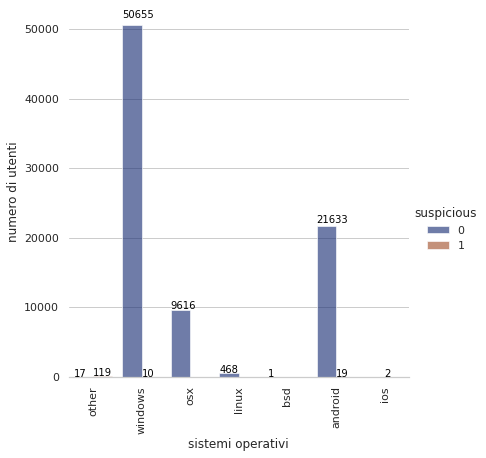

In [73]:
g3 = sns.catplot(
    data=os_suspicious, kind="bar",
    x="os_type", y="num_suspicious", hue="suspicious",
    palette="dark", alpha=.6, height=6
)
g3.despine(left=True)
g3.set_axis_labels("sistemi operativi", "numero di utenti")
g3.legend.set_title("suspicious")
g3.set_xticklabels(rotation=90)

ax = g3.facet_axis(0,0)
ax.set_yscale('linear')
for p in ax.patches:
    ax.text(p.get_x(), 
            p.get_height() * 1.02, 
            '{0:.0f}'.format( 
                p.get_height()
                ), 
            color='black', rotation='horizontal', size='small')

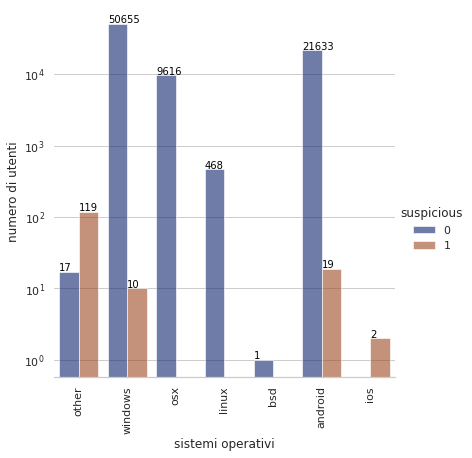

In [74]:
osPlot = sns.catplot(
    data=os_suspicious, kind="bar",
    x="os_type", y="num_suspicious", hue="suspicious",
    palette="dark", alpha=.6, height=6
)
osPlot.despine(left=True)
osPlot.set_axis_labels("sistemi operativi", "numero di utenti")
osPlot.legend.set_title("suspicious")
osPlot.set_xticklabels(rotation=90)

ax = osPlot.facet_axis(0,0)
ax.set_yscale('log')
for p in ax.patches:
    ax.text(p.get_x(), 
            p.get_height() * 1.02, 
            '{0:.0f}'.format( 
                p.get_height()
                ), 
            color='black', rotation='horizontal', size='small')

In [75]:
osPlot.savefig("osType.png")

## Device type

In [76]:
prova_dev = df[(df["suspicious"] == 1)]
prova_dev2 = df[(df["suspicious"] == 0)]
num_susp_dev1 = prova_dev.groupby(by=['suspicious', 'device_type'], 
                          as_index = False)['suspicious'].count().rename(columns={'suspicious':'num_suspicious'})
num_susp_dev1['suspicious'] = 1
num_susp_dev0 = prova_dev2.groupby(by=['suspicious', 'device_type'], 
                           as_index = False)['suspicious'].count().rename(columns={'suspicious':'num_suspicious'})
num_susp_dev0['suspicious'] = 0

num_susp_dev = pd.concat([num_susp_dev0, num_susp_dev1], ignore_index=True, sort=False)
num_susp_dev

col_device_name = 'device_name'
if col_device_name not in num_susp_dev.columns:
  num_susp_dev.insert(3, col_device_name, (np.zeros(num_susp_dev.shape[0], dtype=object)))

col_device_type = 'device_type'
for i, row in num_susp_dev.iterrows():
  if row[col_device_type] == 1:
    num_susp_dev.at[i, col_device_name] = 'mobile'
  elif row[col_device_type] == 2:
    num_susp_dev.at[i, col_device_name] = 'desktop-laptop'
  elif row[col_device_type] == 3:
    num_susp_dev.at[i, col_device_name] = 'unknown'
  elif row[col_device_type] == 4:
    num_susp_dev.at[i, col_device_name] = 'tv'
  elif row[col_device_type] == 5:
    num_susp_dev.at[i, col_device_name] = 'tablet'
  else:
    num_susp_dev.at[i, col_device_name] = 'n/a'

device_suspicious['num_suspicious'] = num_susp_dev['num_suspicious']
device_suspicious

,suspicious,device_type,clicks/impressions,device_name,num_suspicious
0,0,1,0.001102,mobile,21643
1,0,2,0.001318,desktop-laptop,60741
2,0,3,0.000000,unknown,6
3,1,1,0.000000,mobile,22
4,1,2,0.000000,desktop-laptop,8
5,1,3,0.003361,unknown,119
6,1,5,0.000000,tablet,1


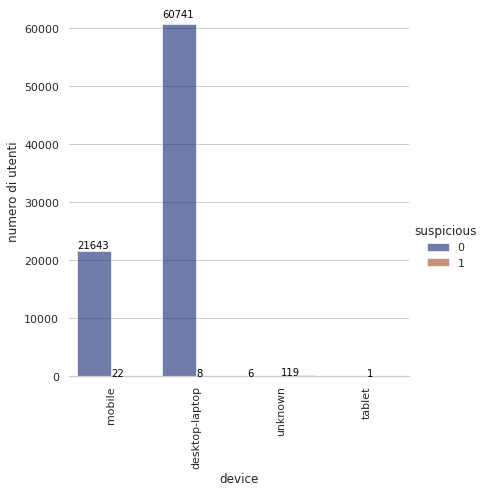

In [77]:
g3 = sns.catplot(
    data=device_suspicious, kind="bar",
    x="device_name", y="num_suspicious", hue="suspicious",
    palette="dark", alpha=.6, height=6
)
g3.despine(left=True)
g3.set_axis_labels("device", "numero di utenti")
g3.legend.set_title("suspicious")
g3.set_xticklabels(rotation=90)

ax = g3.facet_axis(0,0)
ax.set_yscale('linear')
for p in ax.patches:
    ax.text(p.get_x(), 
            p.get_height() * 1.02, 
            '{0:.0f}'.format( 
                p.get_height()
                ), 
            color='black', rotation='horizontal', size='small')

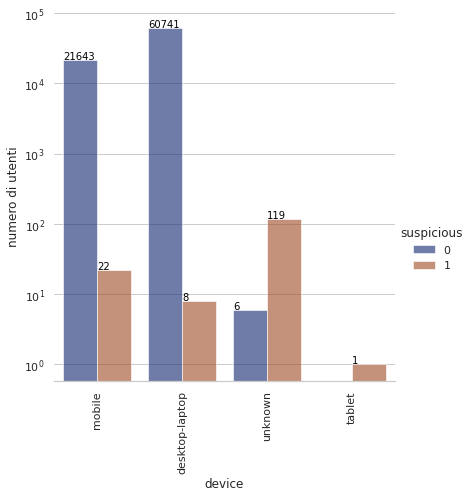

In [78]:
devicePlot = sns.catplot(
    data=device_suspicious, kind="bar",
    x="device_name", y="num_suspicious", hue="suspicious",
    palette="dark", alpha=.6, height=6
)
devicePlot.despine(left=True)
devicePlot.set_axis_labels("device", "numero di utenti")
devicePlot.legend.set_title("suspicious")
devicePlot.set_xticklabels(rotation=90)

ax = devicePlot.facet_axis(0,0)
ax.set_yscale('log')
for p in ax.patches:
    ax.text(p.get_x(), 
            p.get_height() * 1.02, 
            '{0:.0f}'.format( 
                p.get_height()
                ), 
            color='black', rotation='horizontal', size='small')

In [79]:
devicePlot.savefig("deviceType.png")

## Browser type

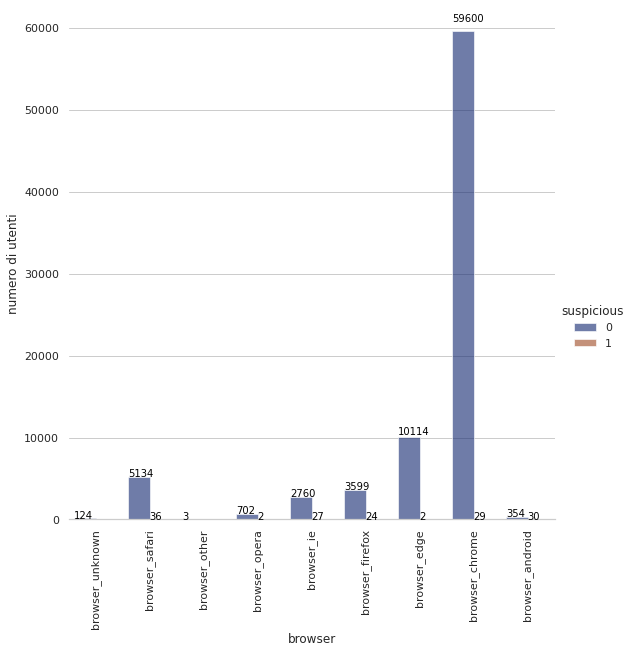

In [80]:
g3 = sns.catplot(
    data=bw_suspicious, kind="bar",
    x="bw_type", y="num_suspicious", hue="suspicious",
    palette="dark", alpha=.6, height=8
)
g3.despine(left=True)
g3.set_axis_labels("browser", "numero di utenti")
g3.legend.set_title("suspicious")
g3.set_xticklabels(rotation=90)

ax = g3.facet_axis(0,0)
ax.set_yscale('linear')
for p in ax.patches:
    ax.text(p.get_x(), 
            p.get_height() * 1.02, 
            '{0:.0f}'.format( 
                p.get_height()
                ), 
            color='black', rotation='horizontal', size='small')

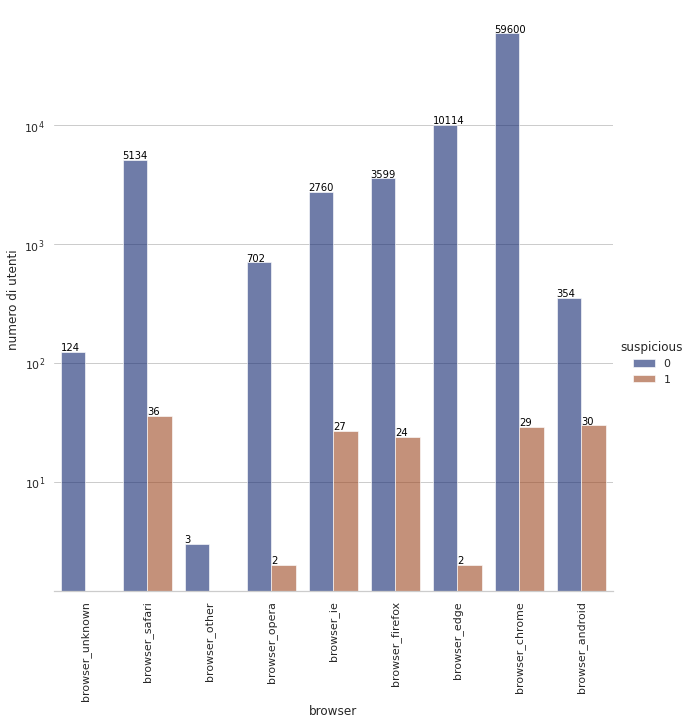

In [81]:
browserPlot = sns.catplot(
    data=bw_suspicious, kind="bar",
    x="bw_type", y="num_suspicious", hue="suspicious",
    palette="dark", alpha=.6, height=9
)
browserPlot.despine(left=True)
browserPlot.set_axis_labels("browser", "numero di utenti")
browserPlot.legend.set_title("suspicious")
browserPlot.set_xticklabels(rotation=90)

ax = browserPlot.facet_axis(0,0)
ax.set_yscale('log')
for p in ax.patches:
    ax.text(p.get_x(), 
            p.get_height() * 1.02, 
            '{0:.0f}'.format( 
                p.get_height()
                ), 
            color='black', rotation='horizontal', size='small')

In [82]:
browserPlot.savefig("browserType.png")